In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_squared_error
from collections import defaultdict
from tensorflow.keras.models import load_model
from keras.utils.vis_utils import plot_model

In [2]:
Predict_Rating = joblib.load("Test_Metrics_v2.joblib")

In [3]:
Predict_Rating = Predict_Rating.drop(['hybrid','coba'],axis=1)
Predict_Rating

,userId,movieId,rating,cb_prediction,new_movieId,new_userId,nn_prediction,0.9NN,0.8NN,0.7NN,0.6NN
0,610,112818,3.0,3.269440,8456,609,3.364139,3.354669,3.345199,3.335729,3.326260
1,610,95377,4.0,4.160789,7901,609,3.610766,3.665768,3.720770,3.775773,3.830775
2,610,101525,4.0,4.046512,8111,609,3.544960,3.595115,3.645271,3.695426,3.745581
3,610,52950,3.0,3.141953,6461,609,3.560360,3.518519,3.476678,3.434838,3.392997
4,610,33679,3.0,3.571037,5895,609,3.520683,3.525718,3.530754,3.535789,3.540825
...,...,...,...,...,...,...,...,...,...,...,...
30,1,2387,5.0,4.550053,1787,0,4.455188,4.464675,4.474161,4.483648,4.493134
31,1,943,4.0,4.450228,723,0,4.247894,4.268127,4.288361,4.308594,4.328828
32,1,3247,3.0,4.550053,2432,0,3.977965,4.035174,4.092383,4.149591,4.206800
33,1,1208,4.0,4.657230,908,0,5.133348,5.085736,5.038124,4.990513,4.942901


In [40]:
# Metrics

def precision_recall_at_k(predictions, k=10, threshold=3.5):
    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for index, row in predictions.iterrows(): 
        uid = row['userId']
        user_est_true[uid].append((row['0.8NN'], row['rating']))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls

def RMSE(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

In [150]:
doc = Predict_Rating[Predict_Rating['userId'] == 1][['userId','movieId','rating','0.8NN']]
precisions_, recalls_ = precision_recall_at_k(doc, k=10, threshold=3.5)
avg_precision = sum(precisions_.values()) / len(precisions_)
avg_recall = sum(recalls_.values()) / len(recalls_)

In [151]:
avg_recall

0.27586206896551724

In [152]:
avg_precision

0.8

In [153]:
def highlight_greaterthan(s,column):
    is_max = pd.Series(data=False, index=s.index)
    is_max[column] = s.loc[column] >= 1
    return ['background-color: red' if is_max.any() else '' for v in is_max]

def relevant_items_recommend_at_k(s):
    if s.rating >= 3.5 and s["y_pred"] > 3.5:
        return ['background-color: cyan']*4
    else:
        return ['background-color: white']*4
    
def relevant_items(s):
    if s.rating >= 3.5:
        return ['background-color: orange']*4
    else:
        return ['background-color: white']*4
    
def recommend_item_at_k(s):
    if s["y_pred"] >= 3.5:
        return ['background-color: yellow']*4
    else:
        return ['background-color: white']*4

In [155]:
doc = Predict_Rating[Predict_Rating['userId'] == 1][['userId','movieId','rating','0.8NN']]
doc.columns = ['userId','movieId','rating','y_pred']
doc = doc.sort_values('y_pred',ascending=False)[:10]
doc.style.apply(relevant_items_recommend_at_k, axis=1)

,userId,movieId,rating,y_pred
34,1,1213,5.000000,5.079590
33,1,1208,4.000000,5.038124
18,1,3147,5.000000,4.912833
17,1,1219,2.000000,4.799093
24,1,457,5.000000,4.750697
22,1,47,5.000000,4.733463
0,1,1258,3.000000,4.721408
27,1,3740,4.000000,4.703429
23,1,2944,5.000000,4.700918
29,1,1220,5.000000,4.681022


In [156]:
doc = Predict_Rating[Predict_Rating['userId'] == 1][['userId','movieId','rating','0.8NN']]
doc.columns = ['userId','movieId','rating','y_pred']
doc = doc.sort_values('y_pred',ascending=False)[:10]
doc.style.apply(recommend_item_at_k, axis=1)

,userId,movieId,rating,y_pred
34,1,1213,5.000000,5.079590
33,1,1208,4.000000,5.038124
18,1,3147,5.000000,4.912833
17,1,1219,2.000000,4.799093
24,1,457,5.000000,4.750697
22,1,47,5.000000,4.733463
0,1,1258,3.000000,4.721408
27,1,3740,4.000000,4.703429
23,1,2944,5.000000,4.700918
29,1,1220,5.000000,4.681022


In [157]:
doc = Predict_Rating[Predict_Rating['userId'] == 1][['userId','movieId','rating','0.8NN']]
doc.columns = ['userId','movieId','rating','y_pred']
doc = doc.sort_values('y_pred',ascending=False)
doc.style.apply(relevant_items, axis=1)

,userId,movieId,rating,y_pred
34,1,1213,5.000000,5.079590
33,1,1208,4.000000,5.038124
18,1,3147,5.000000,4.912833
17,1,1219,2.000000,4.799093
24,1,457,5.000000,4.750697
22,1,47,5.000000,4.733463
0,1,1258,3.000000,4.721408
27,1,3740,4.000000,4.703429
23,1,2944,5.000000,4.700918
29,1,1220,5.000000,4.681022


In [161]:
doc = Predict_Rating[Predict_Rating['userId'] == 1][['userId','movieId','rating','0.8NN']]
doc.columns = ['userId','movieId','rating','y_pred']
doc = doc.sort_values('y_pred',ascending=False)[:15]
doc.style.apply(relevant_items_recommend_at_k, axis=1)

,userId,movieId,rating,y_pred
34,1,1213,5.000000,5.079590
33,1,1208,4.000000,5.038124
18,1,3147,5.000000,4.912833
17,1,1219,2.000000,4.799093
24,1,457,5.000000,4.750697
22,1,47,5.000000,4.733463
0,1,1258,3.000000,4.721408
27,1,3740,4.000000,4.703429
23,1,2944,5.000000,4.700918
29,1,1220,5.000000,4.681022


In [162]:
doc = Predict_Rating[Predict_Rating['userId'] == 1][['userId','movieId','rating','0.8NN']]
doc.columns = ['userId','movieId','rating','y_pred']
doc = doc.sort_values('y_pred',ascending=False)[:15]
doc.style.apply(recommend_item_at_k, axis=1)

,userId,movieId,rating,y_pred
34,1,1213,5.000000,5.079590
33,1,1208,4.000000,5.038124
18,1,3147,5.000000,4.912833
17,1,1219,2.000000,4.799093
24,1,457,5.000000,4.750697
22,1,47,5.000000,4.733463
0,1,1258,3.000000,4.721408
27,1,3740,4.000000,4.703429
23,1,2944,5.000000,4.700918
29,1,1220,5.000000,4.681022


In [164]:
doc = Predict_Rating[Predict_Rating['userId'] == 1][['userId','movieId','rating','0.8NN']]
doc.columns = ['userId','movieId','rating','y_pred']
doc = doc.sort_values('y_pred',ascending=False)[:20]
doc.style.apply(relevant_items_recommend_at_k, axis=1)

,userId,movieId,rating,y_pred
34,1,1213,5.000000,5.079590
33,1,1208,4.000000,5.038124
18,1,3147,5.000000,4.912833
17,1,1219,2.000000,4.799093
24,1,457,5.000000,4.750697
22,1,47,5.000000,4.733463
0,1,1258,3.000000,4.721408
27,1,3740,4.000000,4.703429
23,1,2944,5.000000,4.700918
29,1,1220,5.000000,4.681022


In [165]:
doc = Predict_Rating[Predict_Rating['userId'] == 1][['userId','movieId','rating','0.8NN']]
doc.columns = ['userId','movieId','rating','y_pred']
doc = doc.sort_values('y_pred',ascending=False)[:20]
doc.style.apply(recommend_item_at_k, axis=1)

,userId,movieId,rating,y_pred
34,1,1213,5.000000,5.079590
33,1,1208,4.000000,5.038124
18,1,3147,5.000000,4.912833
17,1,1219,2.000000,4.799093
24,1,457,5.000000,4.750697
22,1,47,5.000000,4.733463
0,1,1258,3.000000,4.721408
27,1,3740,4.000000,4.703429
23,1,2944,5.000000,4.700918
29,1,1220,5.000000,4.681022


In [74]:
## CONTENT BASED ##

df_test = Predict_Rating[['userId','movieId','rating','cb_prediction']]
df_test.columns = ['userId','movieId','rating','prediction']
precisions_, recalls_ = precision_recall_at_k(df_test, k=10, threshold=3.5)
avg_precision = sum(precisions_.values()) / len(precisions_)
avg_recall = sum(recalls_.values()) / len(recalls_)
cb_rmse = RMSE(df_test['rating'], df_test['prediction'])

print("Content Based")
print("Average Precision @ 10 --->", avg_precision)
print("Average Recall    @ 10 --->", avg_recall)
print("RMSE                   --->", cb_rmse)

Content Based
Average Precision @ 10 ---> 0.6913622170179554
Average Recall    @ 10 ---> 0.5173929498899612
RMSE                   ---> 0.9203236029413142


In [75]:
## NCF ##

df_test = Predict_Rating[['userId','movieId','rating','nn_prediction']]
df_test.columns = ['userId','movieId','rating','prediction']
precisions_, recalls_ = precision_recall_at_k(df_test, k=10, threshold=3.5)
avg_precision = sum(precisions_.values()) / len(precisions_)
avg_recall = sum(recalls_.values()) / len(recalls_)
nn_rmse = RMSE(df_test['rating'], df_test['prediction'])

print("NCF")
print("Average Precision @ 10 --->", avg_precision)
print("Average Recall    @ 10 --->", avg_recall)
print("RMSE                   --->", nn_rmse)

NCF
Average Precision @ 10 ---> 0.7441276346604221
Average Recall    @ 10 ---> 0.5777552620825169
RMSE                   ---> 0.828657547541706


In [76]:
## 0.8NN ##

df_test = Predict_Rating[['userId','movieId','rating','0.8NN']]
df_test.columns = ['userId','movieId','rating','prediction']
precisions_, recalls_ = precision_recall_at_k(df_test, k=10, threshold=3.5)
avg_precision = sum(precisions_.values()) / len(precisions_)
avg_recall = sum(recalls_.values()) / len(recalls_)
hb_rmse = RMSE(df_test['rating'], df_test['prediction'])

print("Hybrid")
print("Average Precision @ 10 --->", avg_precision)
print("Average Recall    @ 10 --->", avg_recall)
print("RMSE                   --->", hb_rmse)

Hybrid
Average Precision @ 10 ---> 0.7477647671090297
Average Recall    @ 10 ---> 0.5783871285864016
RMSE                   ---> 0.8213486412684681


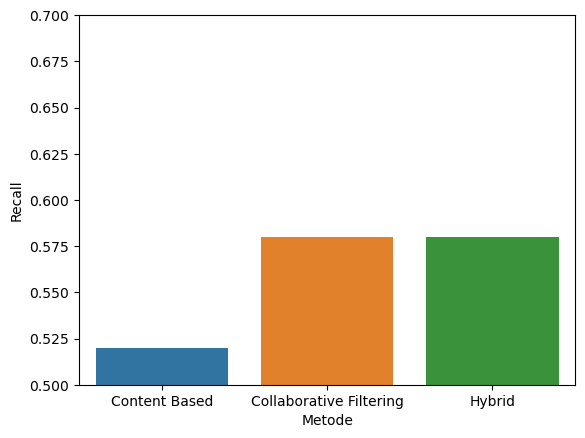

In [77]:
# MAP@K Plot
method = ['Content Based','Collaborative Filtering','Hybrid']
y = [np.round(0.5173929498899612,2) , np.round(0.5777552620825169,2), np.round(0.5783871285864016,2)]

sns.barplot(x=method, y=y)
plt.xlabel("Metode")
plt.ylabel("Recall")
plt.ylim(0.5, 0.7);

In [8]:
res = pd.DataFrame()
res['Method'] = ['Root Mean Square Error','MAP@10','Recall']
res['Content Based'] = [np.round(cb_rmse,2),np.round(0.6913622170179553,2),np.round(0.5174159151220605,2)]
res['Collaborative Filtering'] = [np.round(nn_rmse,2),np.round(0.7441276346604216,2),np.round(0.5777552620825169,2)]
res['Hybrid Filtering'] = [np.round(hb_rmse,2),np.round(0.7477647671090297,2),np.round(0.5783871285864021,2)]

res.index = res['Method']
res = res.drop('Method',axis=1)
res.T

Method,Root Mean Square Error,MAP@10,Recall
Content Based,0.92,0.69,0.52
Collaborative Filtering,0.83,0.74,0.58
Hybrid Filtering,0.82,0.75,0.58


In [9]:
col = ['0.9NN','0.8NN','0.7NN','0.6NN']
result = []
for i in col:
    y_true = Predict_Rating['rating']
    y_pred = Predict_Rating[i]
    
    result.append(RMSE(y_true,y_pred))

In [10]:
result

[0.8233381408651496,
 0.8213486412684681,
 0.8227131945557273,
 0.8274152164296155]

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

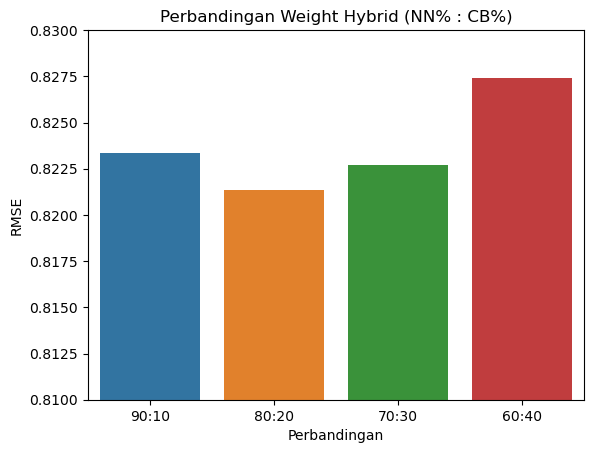

In [28]:
sns.barplot(x=["90:10","80:20","70:30","60:40"], y=result)
plt.title("Perbandingan Weight Hybrid (NN% : CB%)")
plt.ylim(0.81, 0.83);
plt.xlabel("Perbandingan")
plt.ylabel("RMSE");

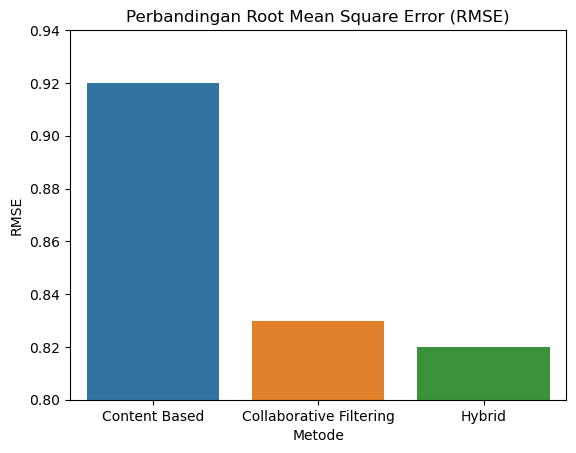

In [13]:
# RMSE Plot
method = ['Content Based','Collaborative Filtering','Hybrid']
y = [np.round(0.9203236029413142,2) , np.round(0.828657547541706,2), np.round(0.8213486412684681,2)]

sns.barplot(x=method, y=y)
plt.title("Perbandingan Root Mean Square Error (RMSE)")
plt.xlabel("Metode")
plt.ylabel("RMSE")
plt.ylim(0.8, 0.94);

In [21]:
# Deep Learning Model
model = load_model("DNN_Model.h5")

In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input User (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 Input Movie (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 40)        24400       ['Input User[0][0]']             
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 40)        388960      ['Input Movie[0][0]']            
                                                                                              

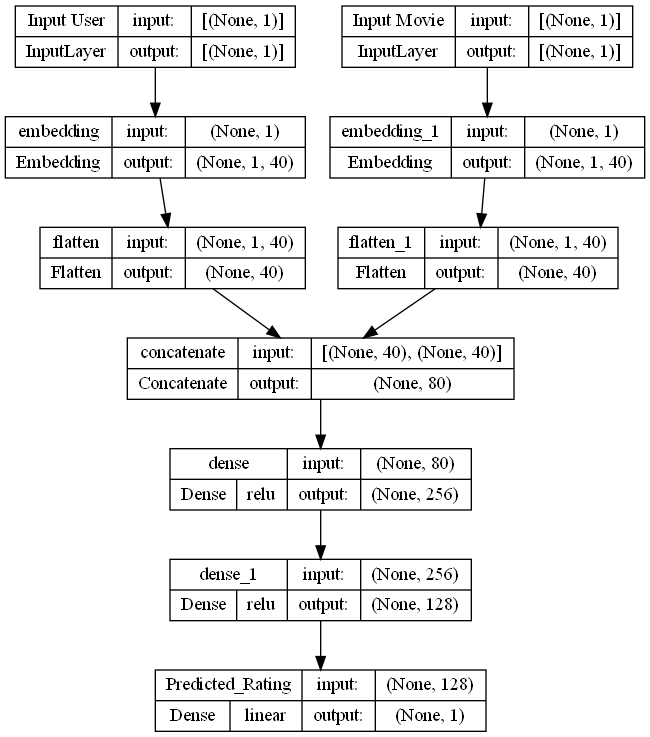

In [23]:
plot_model(model, 
           to_file='DNN_Model_Architecture_v2.png', 
           show_shapes=True, 
           show_layer_names=True, 
           show_layer_activations=True, 
           show_dtype=False)

In [24]:
Predict_Rating

,userId,movieId,rating,cb_prediction,new_movieId,new_userId,nn_prediction,0.9NN,0.8NN,0.7NN,0.6NN
0,610,112818,3.0,3.269440,8456,609,3.364139,3.354669,3.345199,3.335729,3.326260
1,610,95377,4.0,4.160789,7901,609,3.610766,3.665768,3.720770,3.775773,3.830775
2,610,101525,4.0,4.046512,8111,609,3.544960,3.595115,3.645271,3.695426,3.745581
3,610,52950,3.0,3.141953,6461,609,3.560360,3.518519,3.476678,3.434838,3.392997
4,610,33679,3.0,3.571037,5895,609,3.520683,3.525718,3.530754,3.535789,3.540825
...,...,...,...,...,...,...,...,...,...,...,...
30,1,2387,5.0,4.550053,1787,0,4.455188,4.464675,4.474161,4.483648,4.493134
31,1,943,4.0,4.450228,723,0,4.247894,4.268127,4.288361,4.308594,4.328828
32,1,3247,3.0,4.550053,2432,0,3.977965,4.035174,4.092383,4.149591,4.206800
33,1,1208,4.0,4.657230,908,0,5.133348,5.085736,5.038124,4.990513,4.942901


In [25]:
movies = pd.read_csv('ml-latest-small/movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [26]:
Predict_Rating = pd.merge(movies, Predict_Rating, on='movieId')

In [27]:
Predict_Rating

,movieId,title,genres,userId,rating,cb_prediction,new_movieId,new_userId,nn_prediction,0.9NN,0.8NN,0.7NN,0.6NN
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,603,4.0,2.002605,0,602,3.736143,3.562789,3.389435,3.216081,3.042727
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,562,4.5,4.343007,0,561,4.314410,4.317270,4.320130,4.322989,4.325849
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,555,4.0,4.113392,0,554,3.908441,3.928936,3.949431,3.969927,3.990422
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,517,4.0,2.636280,0,516,2.641063,2.640585,2.640107,2.639628,2.639150
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,509,4.0,3.218911,0,508,3.580174,3.544048,3.507922,3.471795,3.435669
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi,25,5.0,4.209450,9691,24,4.542188,4.508914,4.475640,4.442366,4.409093
15418,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62,4.0,3.644399,9692,61,4.082402,4.038602,3.994802,3.951001,3.907201
15419,188797,Tag (2018),Comedy,514,4.0,3.244485,9698,513,3.057156,3.075889,3.094622,3.113355,3.132088
15420,189043,Boundaries (2018),Comedy|Drama,338,2.5,3.196616,9700,337,2.345459,2.430575,2.515690,2.600806,2.685922
